# Projeto de previsão de churn com a base de dados Telco Customer Churn.
    Como primeiro projeto de dados/ml, usarei este notebook também como um fluxo de pensamentos sobre o que devo fazer a cada passo do projeto

## Primeiro passo: Carregar os dados

In [1]:
import pandas as pd

In [2]:
caminho_arquivo = '../data/WA_Fn-UseC_-Telco-Customer-Churn.csv'

In [3]:
try:
    df = pd.read_csv(caminho_arquivo)
    print("Dados carregados com sucesso!")
except FileNotFoundError:
    print(f"Erro: O arquivo não foi encontrado no caminho especificado: {caminho_arquivo}")
except Exception as e:
    print(f"Ocorreu um erro ao carregar o arquivo: {e}")

Dados carregados com sucesso!


## Segundo passo: Primeiras verificações.
    Visualizando as primeiras linhas para entender a disposição dos dados

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Verificando os tipos de dados e valores ausente

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

Uma vez que não há valores ausentes, seguiremos com as estatísticas descritivas das colunas numéricas.

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


Foi identificado posteriormente que a coluna TotalCharges não apresenta apenas variáveis numéricas, portanto a mesma será tratada através do Numpy

In [8]:
import numpy as np

df_temp = df.copy()

df_temp['TotalCharges'] = pd.to_numeric(df_temp['TotalCharges'], errors = 'coerce')

print("Número de valores NaN na coluna 'TotalCharges':")
print(df_temp['TotalCharges'].isnull().sum())

Número de valores NaN na coluna 'TotalCharges':
11


In [9]:
#filtrar o DataFrame para ver as linhas onde TotalCharges é NaN
linhas_problema = df_temp[df_temp['TotalCharges'].isnull()]
print("\nLinhas com valores não numéricos em 'TotalCharges':")
print(linhas_problema)


Linhas com valores não numéricos em 'TotalCharges':
      customerID  gender  SeniorCitizen Partner Dependents  tenure  \
488   4472-LVYGI  Female              0     Yes        Yes       0   
753   3115-CZMZD    Male              0      No        Yes       0   
936   5709-LVOEQ  Female              0     Yes        Yes       0   
1082  4367-NUYAO    Male              0     Yes        Yes       0   
1340  1371-DWPAZ  Female              0     Yes        Yes       0   
3331  7644-OMVMY    Male              0     Yes        Yes       0   
3826  3213-VVOLG    Male              0     Yes        Yes       0   
4380  2520-SGTTA  Female              0     Yes        Yes       0   
5218  2923-ARZLG    Male              0     Yes        Yes       0   
6670  4075-WKNIU  Female              0     Yes        Yes       0   
6754  2775-SEFEE    Male              0      No        Yes       0   

     PhoneService     MultipleLines InternetService       OnlineSecurity  ...  \
488            No  No pho

In [10]:
# Crie uma cópia para o pré-processamento
df_processed = df.copy()

# A coluna 'TotalCharges' tem espaços em branco (' ') que impedem a conversão
# O valor .str.replace() substitui todos os espaços em branco por NaN
df_processed['TotalCharges'] = df_processed['TotalCharges'].replace(' ', np.nan)

# Agora sim, você pode preencher os valores NaN com 0
df_processed['TotalCharges'] = df_processed['TotalCharges'].fillna(0)

# E converter a coluna para float
df_processed['TotalCharges'] = df_processed['TotalCharges'].astype(float)

print(df_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Terceiro passo: Visualizar a distribuição de veriáveis e a relação delas com a variável Churn através das bibliotecas matplotlib e seaborn

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

%matplotlib inline

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../src')))

from eda_utils import plot_categorical, plot_numerical, plot_hist

Graficos de contagem para as variáveis gender, Partner, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling e PaymentMethod

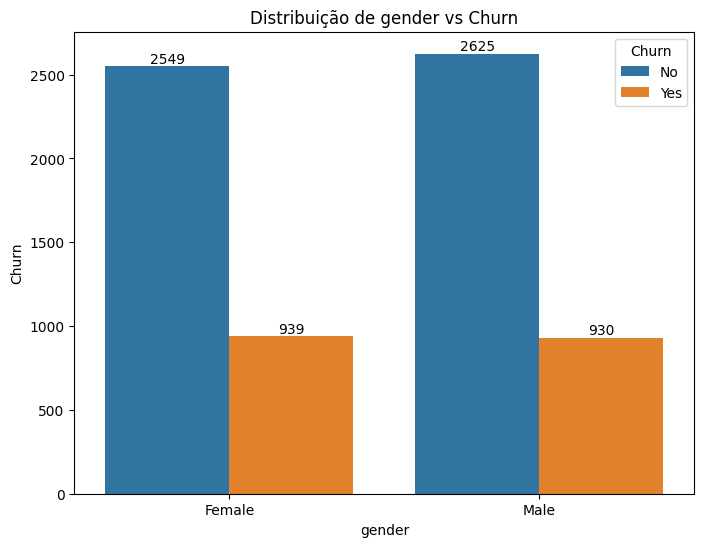

In [12]:
plot_categorical(df, 'gender')

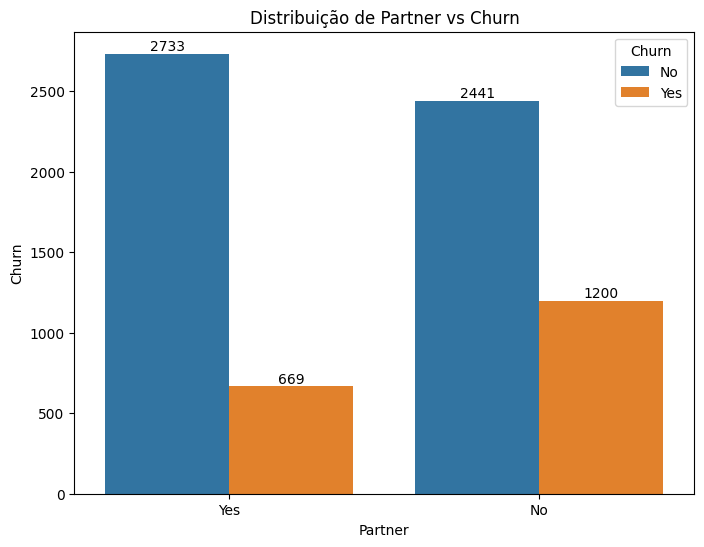

In [13]:
plot_categorical(df, 'Partner')

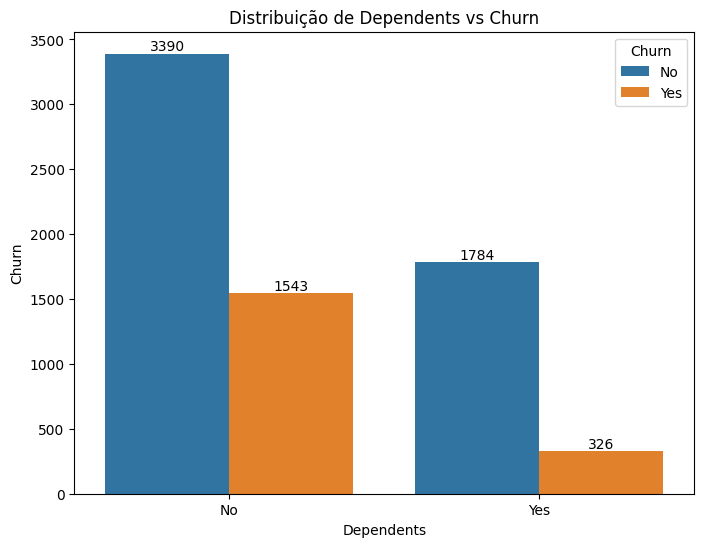

In [14]:
plot_categorical(df, 'Dependents')

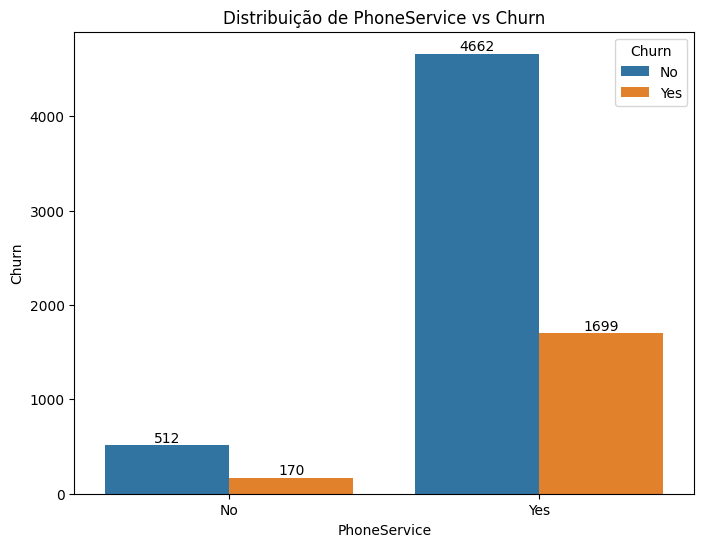

In [15]:
plot_categorical(df, 'PhoneService')

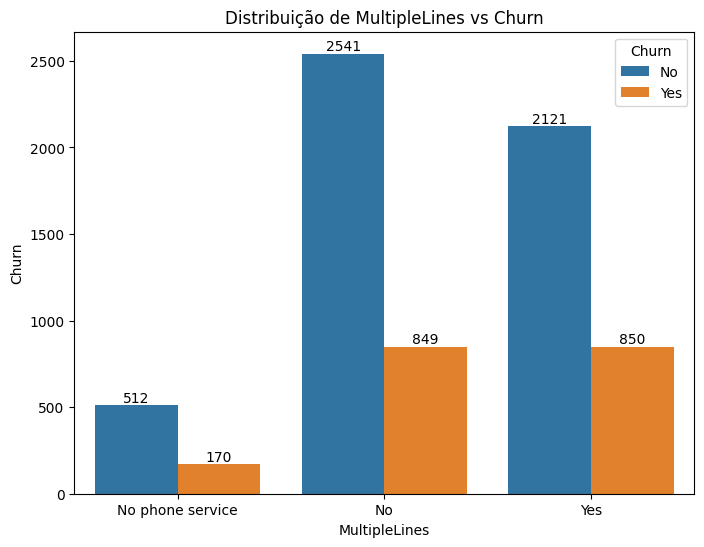

In [16]:
plot_categorical(df, 'MultipleLines')

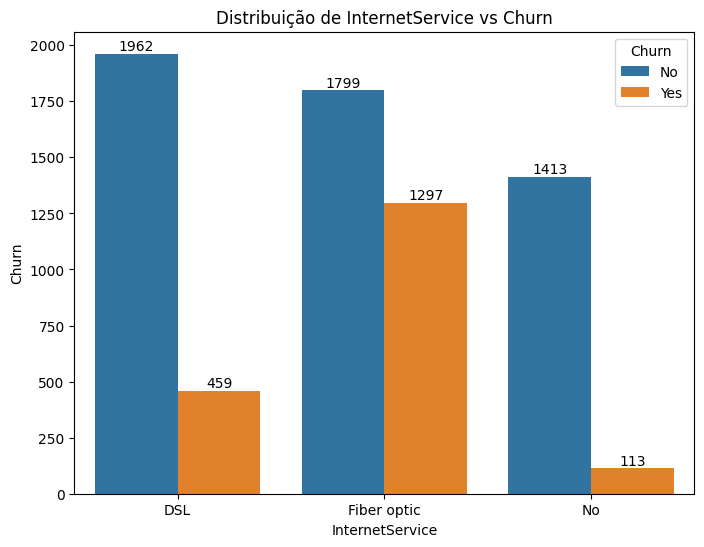

In [17]:
plot_categorical(df, 'InternetService')

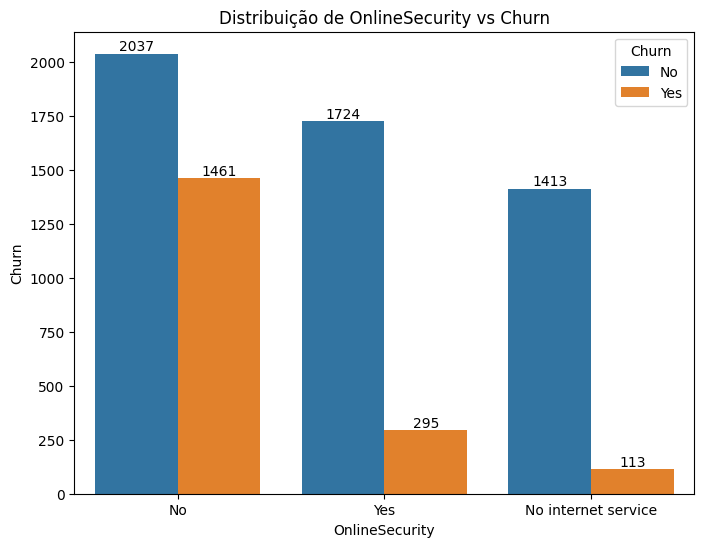

In [18]:
plot_categorical(df, 'OnlineSecurity')

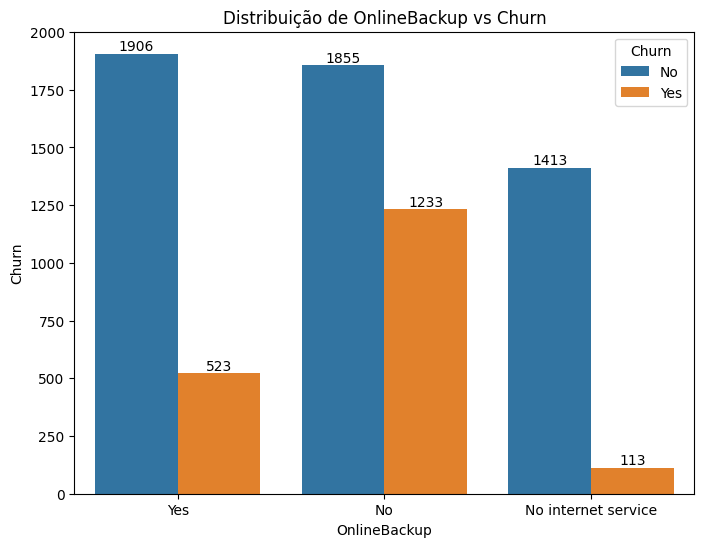

In [19]:
plot_categorical(df, 'OnlineBackup')

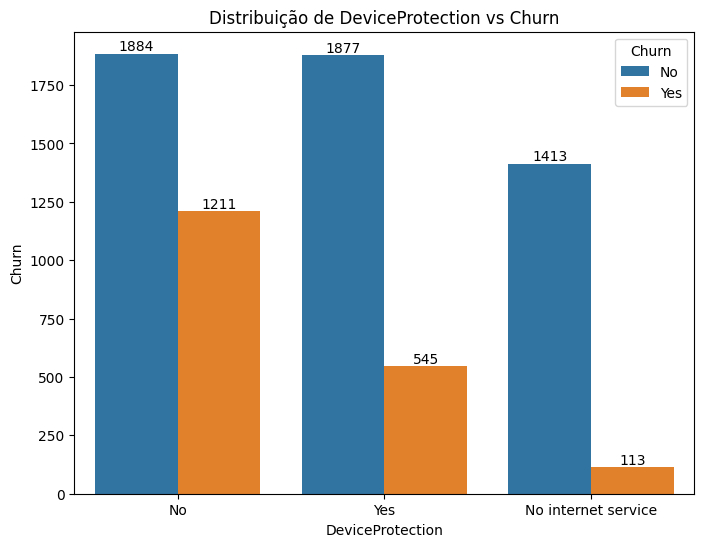

In [20]:
plot_categorical(df, 'DeviceProtection')

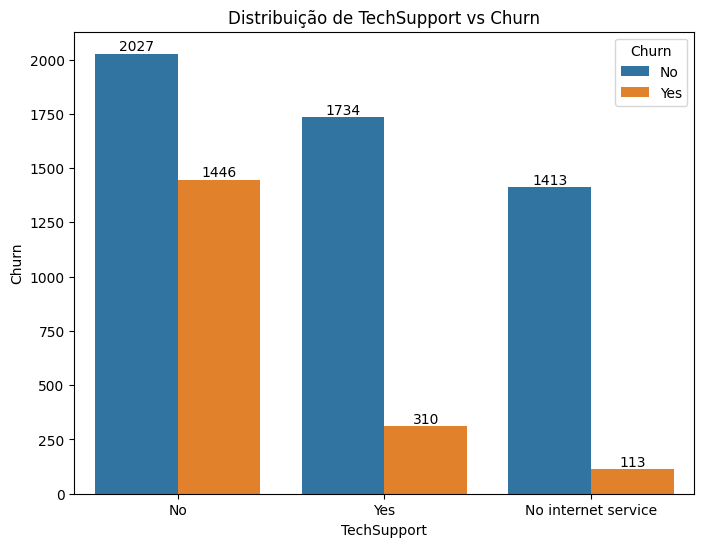

In [21]:
plot_categorical(df, 'TechSupport')

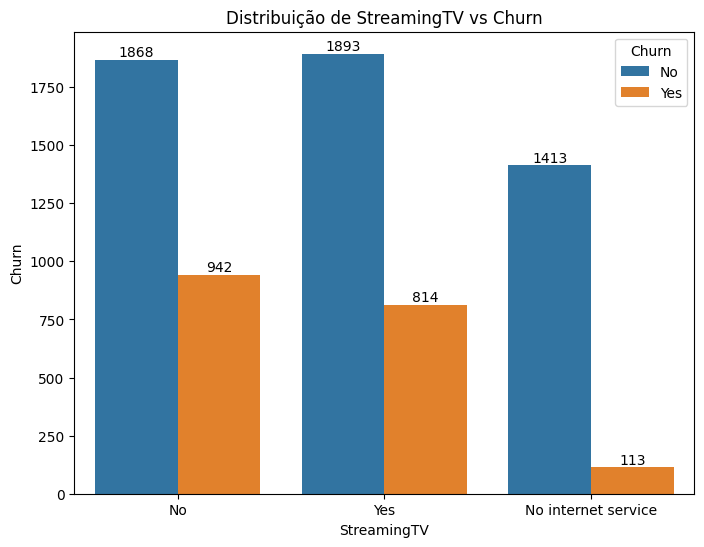

In [22]:
plot_categorical(df, 'StreamingTV')

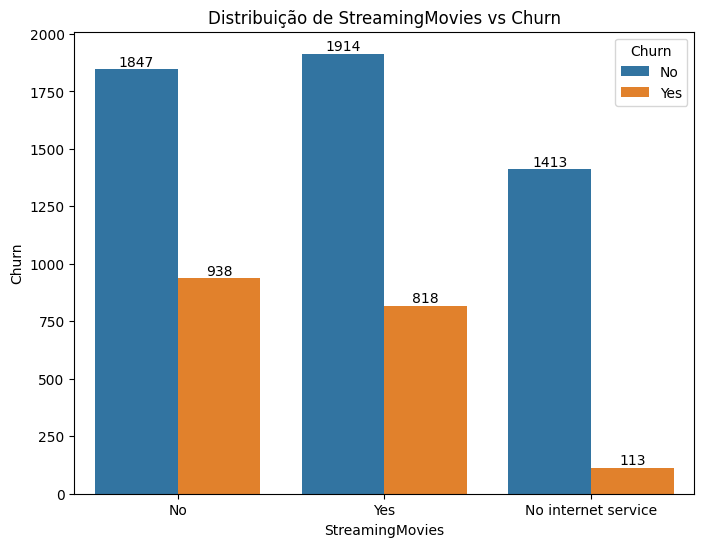

In [23]:
plot_categorical(df, 'StreamingMovies')

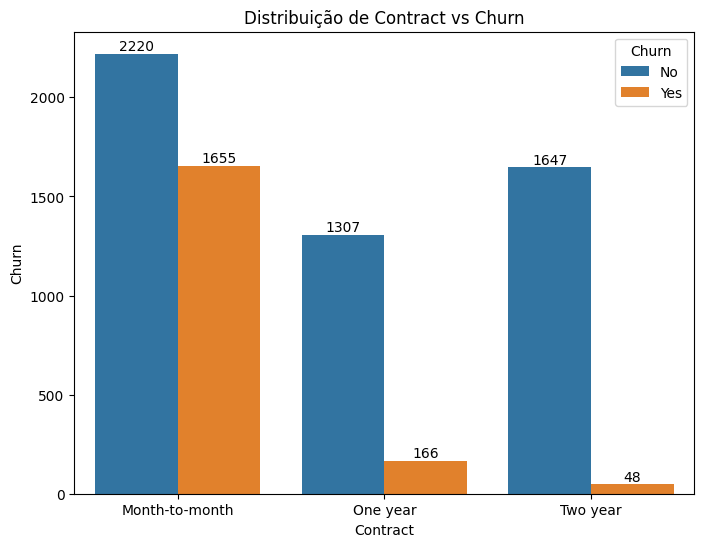

In [24]:
plot_categorical(df, 'Contract')

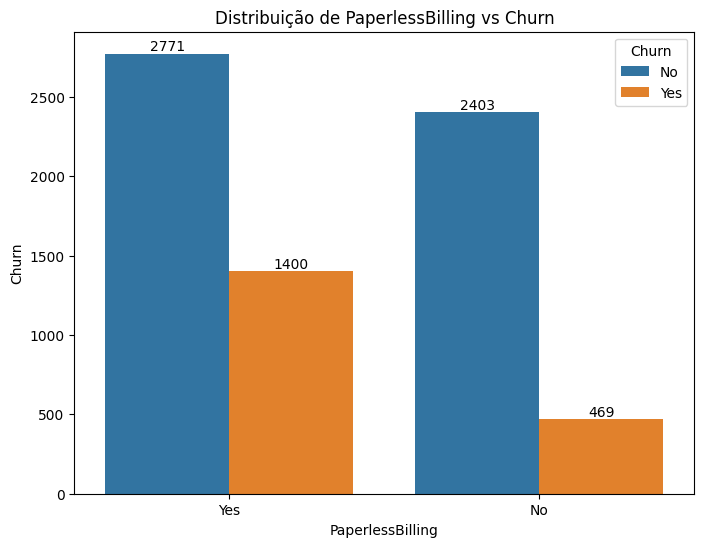

In [25]:
plot_categorical(df, 'PaperlessBilling')

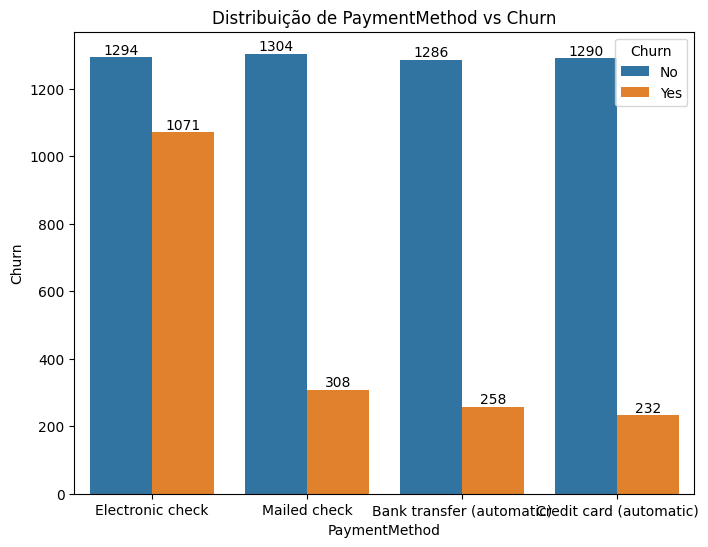

In [26]:
plot_categorical(df, 'PaymentMethod')

Visualização de boxplot e histogramas para as variáveis numéricas tenure, MonthlyCharges e TotalCharges

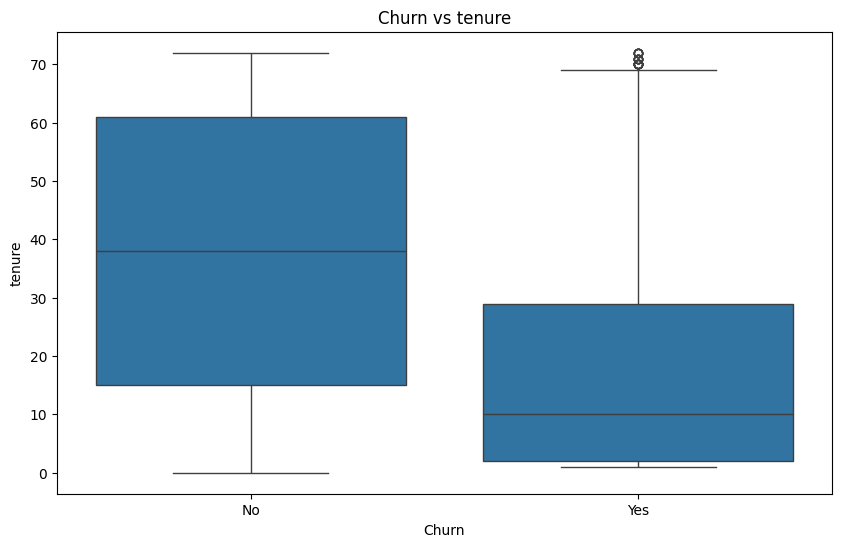

In [27]:
plot_numerical(df, 'tenure')

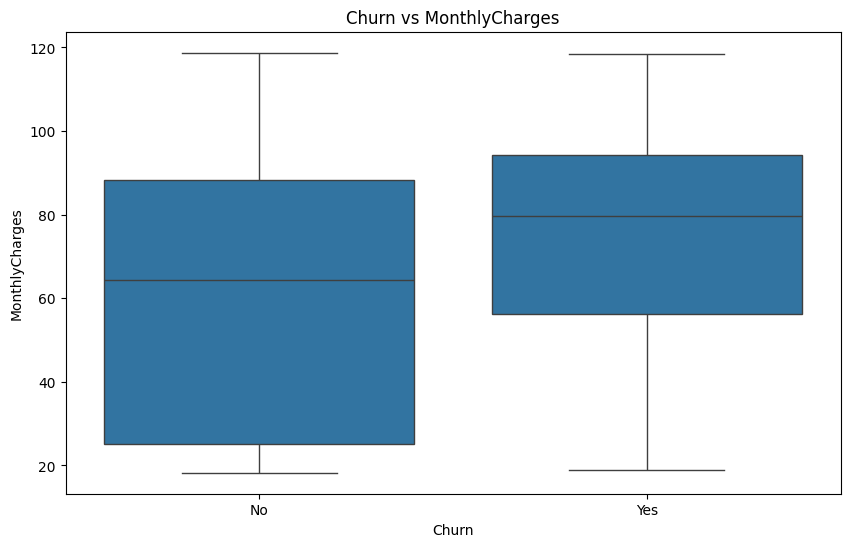

In [28]:
plot_numerical(df, 'MonthlyCharges')

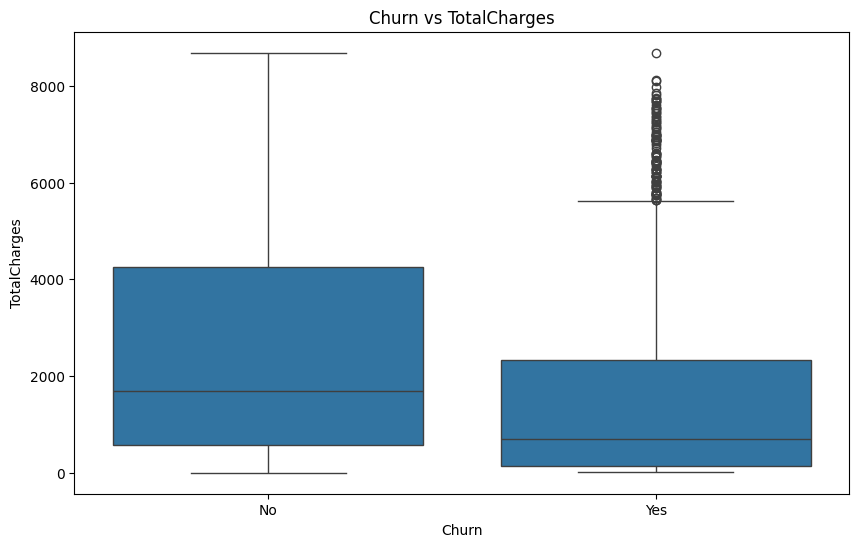

In [29]:
plot_numerical(df_processed, 'TotalCharges')

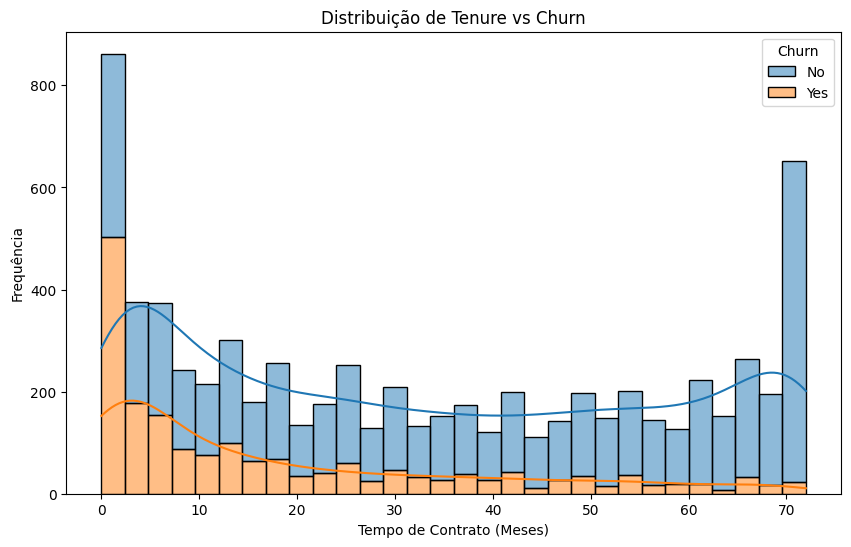

In [30]:
plot_hist(df, 'tenure')

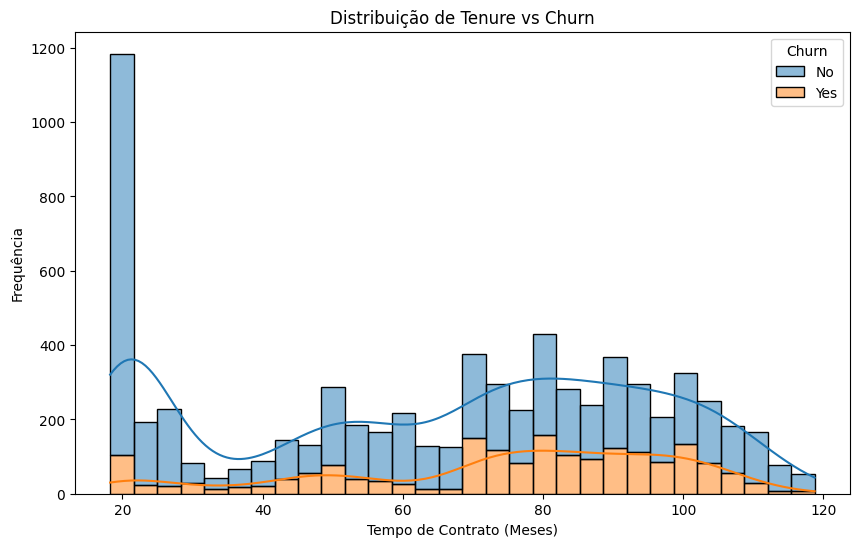

In [31]:
plot_hist(df, 'MonthlyCharges')

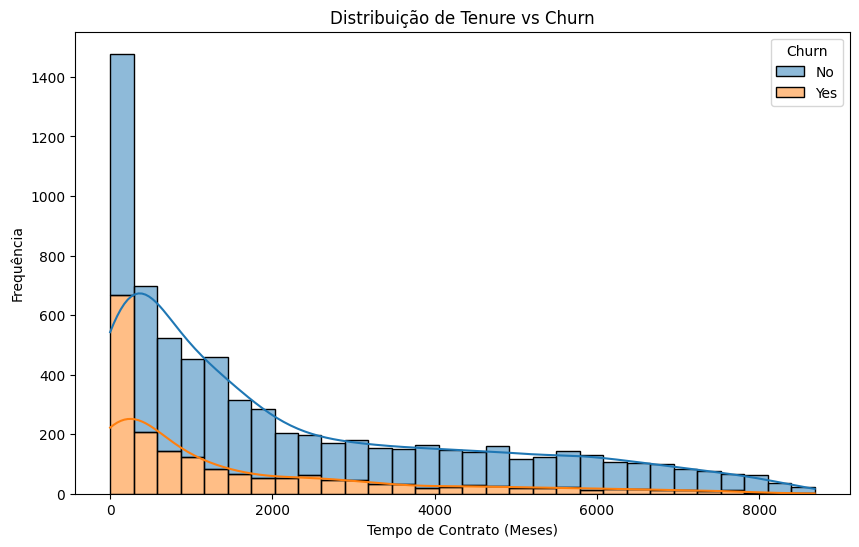

In [32]:
plot_hist(df_processed, 'TotalCharges')

## Quarto Passo: Tratar as variáveis categóricas, transformando-as em numéricas, através de LabelEncoder e OneHotEncoder.
A variável 'gender' não será tratada como binária para evitar que os diferentes valores entre "male" e "female" acarretem em diferentes pesos e análises tendenciosas

In [33]:
from sklearn.preprocessing import LabelEncoder

#criar uma lista de variáveis que serão tratacas como binárias
binarias = ['Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']

#aplicar a transformação através do LabelEncoder
for col in binarias:
    df_processed[col] = LabelEncoder().fit_transform(df_processed[col])

In [34]:
df_processed.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,1,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,0,DSL,2,...,2,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,3668-QPYBK,Male,0,0,0,2,1,0,DSL,2,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,1,DSL,2,...,2,2,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [35]:
#criar uma lista de variáveis que não serão tratadas como binárias e aplicar o OneHotEncoder
categoricas_nominais = ['gender', 'InternetService', 'Contract', 'PaymentMethod']

df_processed = pd.get_dummies(df_processed, columns=categoricas_nominais, dtype=int)

In [36]:
df_processed.head()

,customerID,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,0,1,0,1,0,1,0,2,0,...,1,0,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,34,1,0,2,0,2,...,1,0,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,2,1,0,2,2,0,...,1,0,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,45,0,1,2,0,2,...,1,0,0,0,1,0,1,0,0,0
4,9237-HQITU,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


In [37]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   customerID                               7043 non-null   object 
 1   SeniorCitizen                            7043 non-null   int64  
 2   Partner                                  7043 non-null   int64  
 3   Dependents                               7043 non-null   int64  
 4   tenure                                   7043 non-null   int64  
 5   PhoneService                             7043 non-null   int64  
 6   MultipleLines                            7043 non-null   int64  
 7   OnlineSecurity                           7043 non-null   int64  
 8   OnlineBackup                             7043 non-null   int64  
 9   DeviceProtection                         7043 non-null   int64  
 10  TechSupport                              7043 no

## Quinto Passo: Definir as variáveis Target(churn) e feature(todas as demais)

In [38]:
df_processed = df_processed.drop('customerID', axis=1)

y = df_processed['Churn']

X = df_processed.drop('Churn', axis=1)

X.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,0,1,0,1,0,2,0,0,...,1,0,0,1,0,0,0,0,1,0
1,0,0,0,34,1,0,2,0,2,0,...,1,0,0,0,1,0,0,0,0,1
2,0,0,0,2,1,0,2,2,0,0,...,1,0,0,1,0,0,0,0,0,1
3,0,0,0,45,0,1,2,0,2,2,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,2,1,0,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0


## Sexto passo: Dividir os dados em conjuntos de teste e treino. Utilizarei uma proporsão de 80% para treino e 20% para teste

In [39]:
from sklearn.model_selection import train_test_split

#utilizarei o random_state = 0 para garantir sempre a mesma divisão ao executar o código novamente.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

#imprimir as dimensões dos conjuntos para confirmar a divisão
print(f"Dimensões do X_train: {X_train.shape}")
print(f"Dimensões do X_test: {X_test.shape}")
print(f"Dimensões do y_train: {y_train.shape}")
print(f"Dimensões do y_test: {y_test.shape}")

Dimensões do X_train: (5634, 27)
Dimensões do X_test: (1409, 27)
Dimensões do y_train: (5634,)
Dimensões do y_test: (1409,)


## Setimo Passo: Teste com diferentes modelos
    Os modelos utilizados para este teste serão Regressão Logística, Random Forest, Naive Bayes e Gradient Boosting

### Regressão Logística - 79,63%

In [40]:
from sklearn.linear_model import LogisticRegression

model_logreg = LogisticRegression(solver='liblinear', random_state=0)

model_logreg.fit(X_train.values, y_train)

print("Modelo de Regressão Logística treinado com sucesso!")

Modelo de Regressão Logística treinado com sucesso!


Acurácia do modelo: 0.7963

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87      1041
           1       0.63      0.52      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409



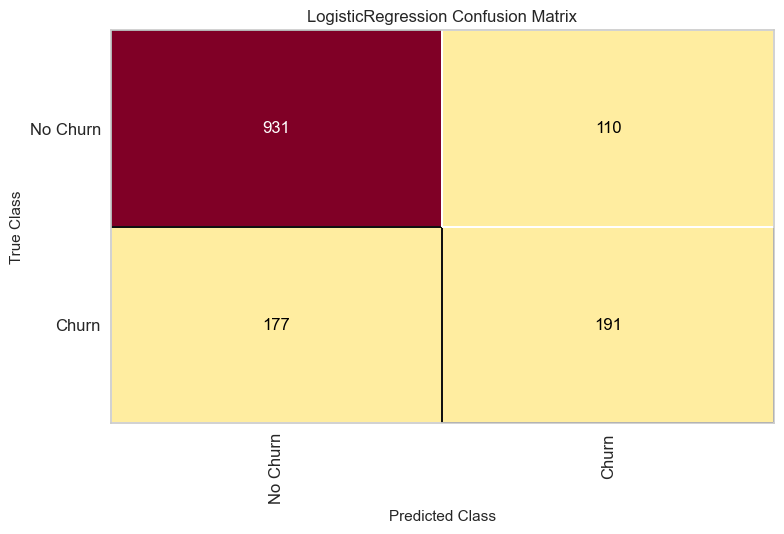

<Axes: title={'center': 'LogisticRegression Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [59]:
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix

# 1. Faça previsões no conjunto de teste
y_pred = model_logreg.predict(X_test.values)

# 2. Calcule a acurácia
accuracy = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo: {accuracy:.4f}\n")

# 3. Exiba o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

# 4. Exiba a matriz de confusão
classes = ['No Churn', 'Churn']
cm = ConfusionMatrix(model_logreg, classes=classes)
cm.fit(X_train.values, y_train)
cm.score(X_test.values, y_test)

cm.show()

### Random Forest - 78,14%

Acurácia do modelo Random Forest: 0.7814

Relatório de Classificação - Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.60      0.49      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



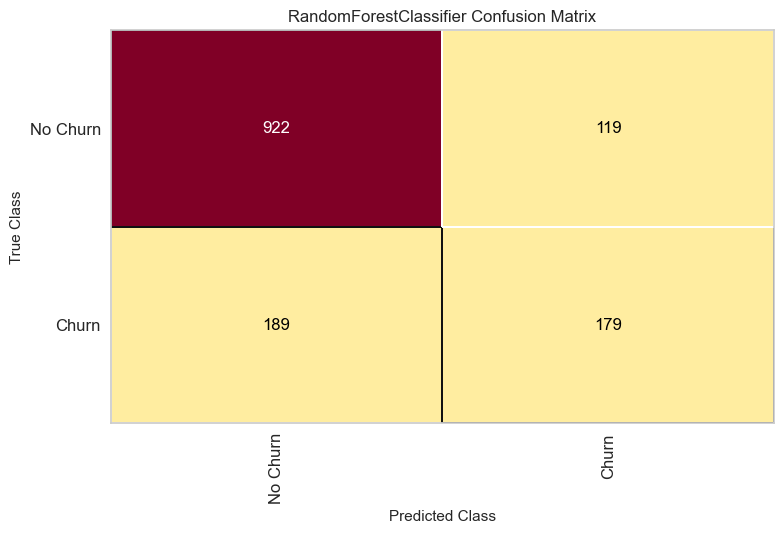

<Axes: title={'center': 'RandomForestClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [55]:
from sklearn.ensemble import RandomForestClassifier

# 1. Instancie o modelo de Random Forest
# Ajuste o parâmetro `n_estimators` para o número de árvores
# `random_state` garante a reprodutibilidade
model_rf = RandomForestClassifier(n_estimators=100, random_state=42)

# 2. Treine o modelo com os dados de treino
model_rf.fit(X_train.values, y_train)

# 3. Faça previsões no conjunto de teste
y_pred_rf = model_rf.predict(X_test.values)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Acurácia do modelo Random Forest: {accuracy_rf:.4f}\n")

# 4. Exiba o relatório de classificação
print("Relatório de Classificação - Random Forest:")
print(classification_report(y_test, y_pred_rf))

# 5. Gere a Matriz de Confusão com Yellowbrick para o Random Forest
classes = ['No Churn', 'Churn']
cm_rf = ConfusionMatrix(model_rf, classes=classes)
cm_rf.fit(X_train.values, y_train)
cm_rf.score(X_test.values, y_test)
cm_rf.show()

### Navie Bayes - 72.04%

Acurácia do modelo Naive Bayes: 0.7204

Relatório de Classificação - Naive Bayes:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79      1041
           1       0.48      0.76      0.59       368

    accuracy                           0.72      1409
   macro avg       0.69      0.73      0.69      1409
weighted avg       0.79      0.72      0.74      1409



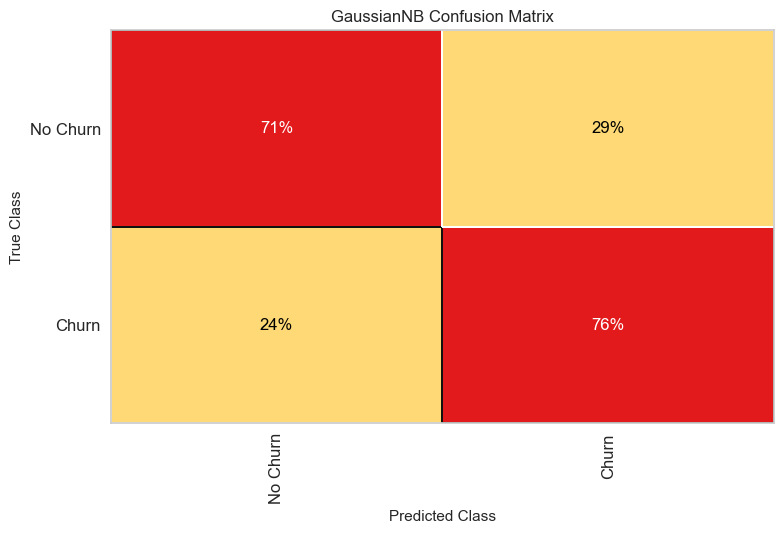

<Axes: title={'center': 'GaussianNB Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [57]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Instancie o modelo Naive Bayes
model_nb = GaussianNB()

# Treine o modelo com os dados de treino
model_nb.fit(X_train.values, y_train)

# Faça previsões no conjunto de teste
y_pred_nb = model_nb.predict(X_test.values)

# Calcule e exiba a acurácia
accuracy_nb = accuracy_score(y_test, y_pred_nb)
print(f"Acurácia do modelo Naive Bayes: {accuracy_nb:.4f}\n")

# Exiba o relatório de classificação
print("Relatório de Classificação - Naive Bayes:")
print(classification_report(y_test, y_pred_nb))

# Gere a Matriz de Confusão com Yellowbrick
classes = ['No Churn', 'Churn']
cm_nb = ConfusionMatrix(model_nb, classes=classes, percent=True)
cm_nb.fit(X_train.values, y_train)
cm_nb.score(X_test.values, y_test)
cm_nb.show()


### Gradient Boosting - 78,28%

Acurácia do modelo XGBoost: 0.7828

Relatório de Classificação - XGBoost:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1041
           1       0.60      0.50      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.78      1409



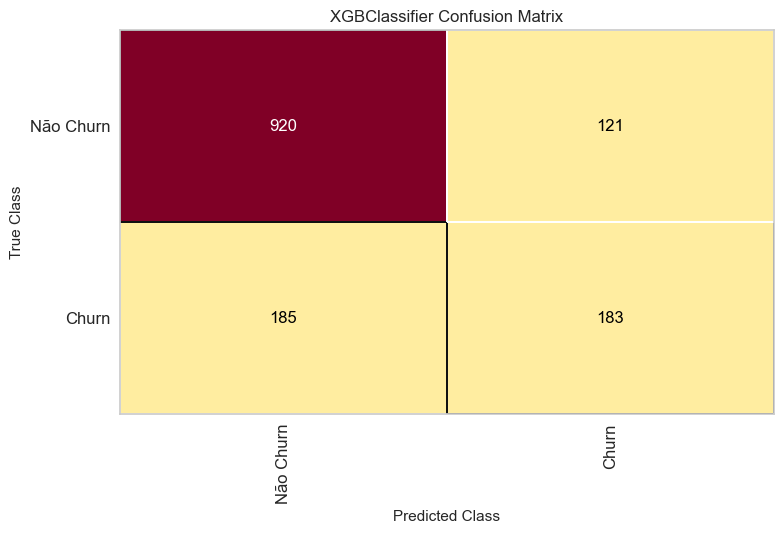

<Axes: title={'center': 'XGBClassifier Confusion Matrix'}, xlabel='Predicted Class', ylabel='True Class'>

In [45]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

# Instancie o modelo XGBoost
# O parâmetro 'use_label_encoder=False' é para evitar um aviso de depreciação
# O parâmetro 'eval_metric' é para evitar um aviso
model_xgb = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# Treine o modelo com os dados de treino
model_xgb.fit(X_train.values, y_train)

# Faça previsões no conjunto de teste
y_pred_xgb = model_xgb.predict(X_test.values)

# Calcule e exiba a acurácia
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
print(f"Acurácia do modelo XGBoost: {accuracy_xgb:.4f}\n")

# Exiba o relatório de classificação
print("Relatório de Classificação - XGBoost:")
print(classification_report(y_test, y_pred_xgb))

# Gere a Matriz de Confusão com Yellowbrick
classes = ['Não Churn', 'Churn']
cm_xgb = ConfusionMatrix(model_xgb, classes=classes)
cm_xgb.fit(X_train.values, y_train)
cm_xgb.score(X_test.values, y_test)
cm_xgb.show()


### Reavaliação dos Modelos

###### Para cada um dos modelos temos os dados de "Churn":

                         Precisão   Recall    f1-score   support
    Regressão Logística:   0.63      0.52      0.57       368
    Random Forest:         0.60      0.49      0.54       368
    Navie Bayes:           0.48      0.76      0.59       368
    Gradient Boosting:     0.60      0.50      0.54       368

    A melhor combinação entre Precisão e Recall fica para o modelo de Gradient Boosting

### Otimização de hiperparâmetros

#### Random Forest

In [71]:
from sklearn.model_selection import GridSearchCV

# Grid para o Random Forest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Configurar o GridSearchCV para Random Forest
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid_rf,
    scoring='recall', # Foco no Recall da classe positiva
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Executar a otimização
grid_search_rf.fit(X_train.values, y_train)

# Obter o melhor modelo Random Forest
best_model_rf = grid_search_rf.best_estimator_

print("\n--- Resultados do Random Forest Otimizado ---")
print(f"Melhor Recall (CV): {grid_search_rf.best_score_:.4f}")
print(f"Melhores Parâmetros: {grid_search_rf.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

--- Resultados do Random Forest Otimizado ---
Melhor Recall (CV): 0.5350
Melhores Parâmetros: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 100}


#### Gradient Boosting

In [72]:
# Grid para o XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],           # Árvores de XGBoost são geralmente menos profundas
    'learning_rate': [0.01, 0.1, 0.2] # Taxa de aprendizagem
}

# Configurar o GridSearchCV para XGBoost
grid_search_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(eval_metric='logloss', random_state=42), # O modelo base
    param_grid=param_grid_xgb,
    scoring='recall', # Foco no Recall
    cv=5,
    n_jobs=-1,
    verbose=1
)

# Executar a otimização
grid_search_xgb.fit(X_train.values, y_train)

# Obter o melhor modelo XGBoost
best_model_xgb = grid_search_xgb.best_estimator_

print("\n--- Resultados do XGBoost Otimizado ---")
print(f"Melhor Recall (CV): {grid_search_xgb.best_score_:.4f}")
print(f"Melhores Parâmetros: {grid_search_xgb.best_params_}")

Fitting 5 folds for each of 27 candidates, totalling 135 fits

--- Resultados do XGBoost Otimizado ---
Melhor Recall (CV): 0.5437
Melhores Parâmetros: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 100}


In [73]:
# Avaliar o Random Forest Otimizado
y_pred_tuned_rf = best_model_rf.predict(X_test.values)
print("\nRelatório de Classificação: Random Forest Otimizado")
print(classification_report(y_test, y_pred_tuned_rf))

# Avaliar o XGBoost Otimizado
y_pred_tuned_xgb = best_model_xgb.predict(X_test.values)
print("\nRelatório de Classificação: XGBoost Otimizado")
print(classification_report(y_test, y_pred_tuned_xgb))


Relatório de Classificação: Random Forest Otimizado
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1041
           1       0.64      0.51      0.57       368

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409


Relatório de Classificação: XGBoost Otimizado
              precision    recall  f1-score   support

           0       0.83      0.88      0.86      1041
           1       0.60      0.49      0.54       368

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



Houve uma queda de performance para o Gradiente Boosting

In [74]:
# 1. Grid para o XGBoost
# Incluímos os valores padrão: learning_rate=0.3 e max_depth=6
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 6, 7],           # Incluindo o padrão 6
    'learning_rate': [0.1, 0.2, 0.3]  # Incluindo o padrão 0.3
}

# 2. Configurar o GridSearchCV para XGBoost (com scoring='f1')
print("Iniciando a otimização do XGBoost (focada em F1)...")
grid_search_xgb = GridSearchCV(
    estimator=xgb.XGBClassifier(eval_metric='logloss', random_state=42),
    param_grid=param_grid_xgb,
    scoring='f1', # 🎯 MUDANÇA: Otimizando para o F1-score
    cv=5,
    n_jobs=-1,
    verbose=1
)

# 3. Executar a otimização
grid_search_xgb.fit(X_train.values, y_train)

# 4. Obter o melhor modelo XGBoost
best_model_xgb = grid_search_xgb.best_estimator_

print("\n--- Resultados do XGBoost Otimizado (F1) ---")
print(f"Melhor F1-score (CV): {grid_search_xgb.best_score_:.4f}")
print(f"Melhores Parâmetros: {grid_search_xgb.best_params_}")

# 5. Avaliação Final
y_pred_tuned_xgb = best_model_xgb.predict(X_test.values)
print("\nRelatório de Classificação: XGBoost Otimizado (F1)")
print(classification_report(y_test, y_pred_tuned_xgb))

Iniciando a otimização do XGBoost (focada em F1)...
Fitting 5 folds for each of 36 candidates, totalling 180 fits

--- Resultados do XGBoost Otimizado (F1) ---
Melhor F1-score (CV): 0.5977
Melhores Parâmetros: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

Relatório de Classificação: XGBoost Otimizado (F1)
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1041
           1       0.62      0.50      0.55       368

    accuracy                           0.79      1409
   macro avg       0.72      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409

